<a href="https://colab.research.google.com/github/Rian021102/Curated-Repo-Omdena-Aswan-Hate-Speech-Detection/blob/main/Hate_Speech_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import string
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
url_df = 'https://drive.google.com/file/d/1BcgE75paz0aWYZa6ErgmlKOsqB1qy9CZ/view?usp=share_link'
path_df = 'https://drive.google.com/uc?export=download&id='+url_df.split('/')[-2]
df = pd.read_csv(path_df)

In [ ]:
df.head()

,clean training,label
0,as a woman you shouldn t complain about cleani...,0
1,boy dats cold tyga dwn bad for cuffin dat hoe ...,1
2,dawg you ever fuck a bitch and she start to cr...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1


## Checking Missing Values

In [ ]:
df.isna().sum()

clean training    1
label             0
dtype: int64

In [ ]:
df02=df.dropna()

In [ ]:
df02.isna().sum()

clean training    0
label             0
dtype: int64

In [ ]:
df02.head()

,clean training,label
0,as a woman you shouldn t complain about cleani...,0
1,boy dats cold tyga dwn bad for cuffin dat hoe ...,1
2,dawg you ever fuck a bitch and she start to cr...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1


**One missing values on clean training**

#EDA

**Though EDA is already done in the previous task, I still geniunly think an EDA is still needed**

In [ ]:
df02.shape

(157912, 2)

## Number of Words in clean_training

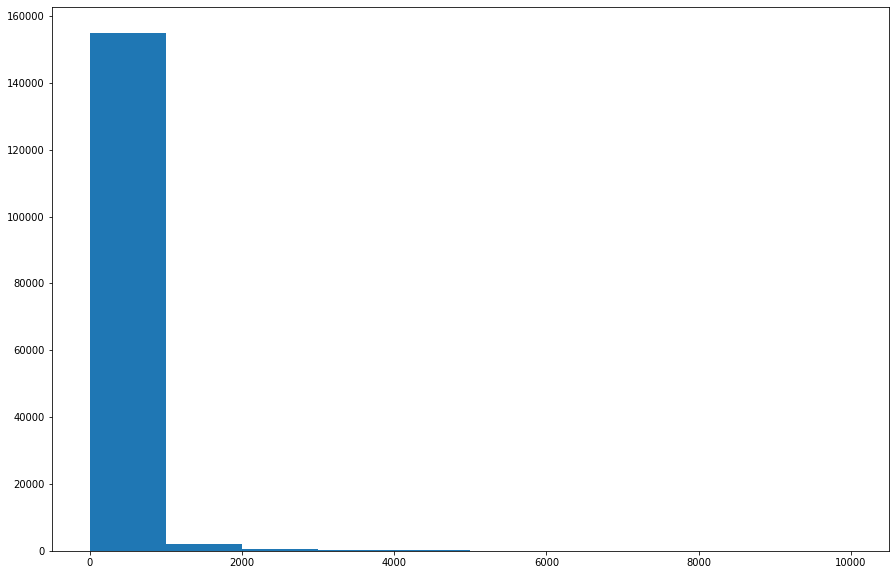

In [ ]:
data = df02['clean training']
plt.figure(figsize=(15, 10))
data.str.len().hist(grid=False)
plt.show()

## Number of Sentences in clean_training

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk.data
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

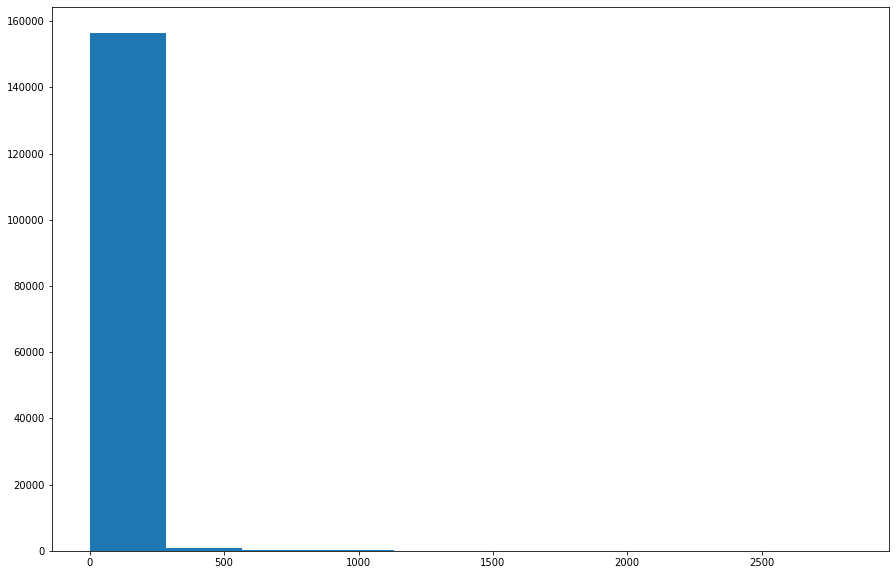

In [ ]:
counts = []

for sentence in df02['clean training']:
    sentence = word_tokenize(str(sentence))
    word_count = len(sentence)
    counts.append(word_count)

fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(counts)

plt.show()

In [ ]:
total_num_words = sum(counts) # total number of words
average_sentence_length = np.mean(counts) # print everage sentence length

word_lengths = []
for sentence in df02['clean training']:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        length = len(word)
        word_lengths.append(length)

average_word_length = np.mean(word_lengths) # print everage word length

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of words in the dataset: {average_word_length} characters.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')

Total number of words in the dataset: 5224251 words.
Average length of words in the dataset: 4.209241669284267 characters.
Average length of sentences in the dataset: 33.083305891889154 words.


## Words that frequently appear

In [ ]:
all_words = []

for sentence in df02['clean training']:
    words = word_tokenize(str(sentence))
    for word in words:
        all_words.append(word)

print(all_words[:100])

['as', 'a', 'woman', 'you', 'shouldn', 't', 'complain', 'about', 'cleaning', 'up', 'your', 'house', 'amp', 'as', 'a', 'man', 'you', 'should', 'always', 'take', 'the', 'trash', 'out', 'boy', 'dats', 'cold', 'tyga', 'dwn', 'bad', 'for', 'cuffin', 'dat', 'hoe', 'in', 'the', 'st', 'place', 'dawg', 'you', 'ever', 'fuck', 'a', 'bitch', 'and', 'she', 'start', 'to', 'cry', 'you', 'be', 'confused', 'as', 'shit', 'she', 'look', 'like', 'a', 'tranny', 'the', 'shit', 'you', 'hear', 'about', 'me', 'might', 'be', 'true', 'or', 'it', 'might', 'be', 'faker', 'than', 'the', 'bitch', 'who', 'told', 'it', 'to', 'ya', 'the', 'shit', 'just', 'blows', 'me', 'claim', 'you', 'so', 'faithful', 'and', 'down', 'for', 'somebody', 'but', 'still', 'fucking', 'with', 'hoes', 'i', 'can']


In [ ]:
from collections import Counter

In [ ]:
most_common = Counter(all_words).most_common(20)
print(most_common)

[('be', 200990), ('the', 175988), ('you', 144688), ('i', 134291), ('to', 123866), ('a', 115586), ('and', 103206), ('of', 86758), ('that', 65655), ('it', 62177), ('in', 58256), ('have', 46436), ('fuck', 45225), ('this', 41753), ('not', 40227), ('for', 38964), ('t', 38480), ('s', 36943), ('your', 35047), ('on', 34391)]


<AxesSubplot:>

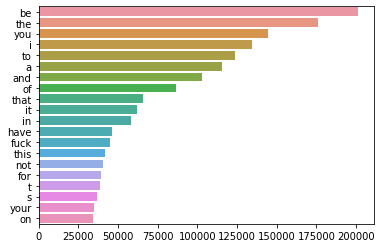

In [ ]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [ ]:
all_words_clean = []

for sentence in df02['clean training']:
    words = word_tokenize(str(sentence))
    for word in words:
        word = word.lower() # lowercase all word
        if len(word) >= 3: # quick solution to get rif of contractions
            # find better solution in official version
            all_words_clean.append(word)

print(all_words_clean[:100])

['woman', 'you', 'shouldn', 'complain', 'about', 'cleaning', 'your', 'house', 'amp', 'man', 'you', 'should', 'always', 'take', 'the', 'trash', 'out', 'boy', 'dats', 'cold', 'tyga', 'dwn', 'bad', 'for', 'cuffin', 'dat', 'hoe', 'the', 'place', 'dawg', 'you', 'ever', 'fuck', 'bitch', 'and', 'she', 'start', 'cry', 'you', 'confused', 'shit', 'she', 'look', 'like', 'tranny', 'the', 'shit', 'you', 'hear', 'about', 'might', 'true', 'might', 'faker', 'than', 'the', 'bitch', 'who', 'told', 'the', 'shit', 'just', 'blows', 'claim', 'you', 'faithful', 'and', 'down', 'for', 'somebody', 'but', 'still', 'fucking', 'with', 'hoes', 'can', 'not', 'just', 'sit', 'and', 'hate', 'another', 'bitch', 'got', 'too', 'much', 'shit', 'going', 'cause', 'tired', 'you', 'big', 'bitches', 'coming', 'for', 'skinny', 'girls', 'amp', 'you', 'might']


In [ ]:
most_common2 = Counter(all_words_clean).most_common(20)
print(most_common2)

[('the', 175988), ('you', 144688), ('and', 103206), ('that', 65655), ('have', 46436), ('fuck', 45225), ('this', 41753), ('not', 40227), ('for', 38964), ('your', 35047), ('with', 28804), ('all', 23388), ('they', 22232), ('but', 21094), ('can', 20936), ('like', 20925), ('what', 18636), ('just', 17951), ('people', 17772), ('get', 17094)]


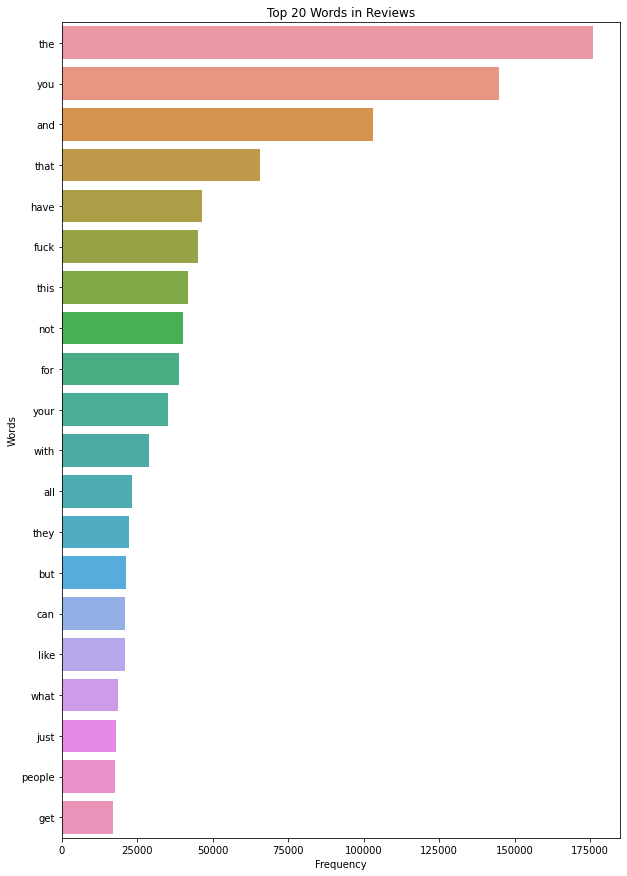

In [ ]:
words, frequency = [], []
for word, count in most_common2:
    words.append(word)
    frequency.append(count)

fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=frequency, y=words, ax=ax)
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title('Top 20 Words in Reviews')

plt.show()

## Most Frequent

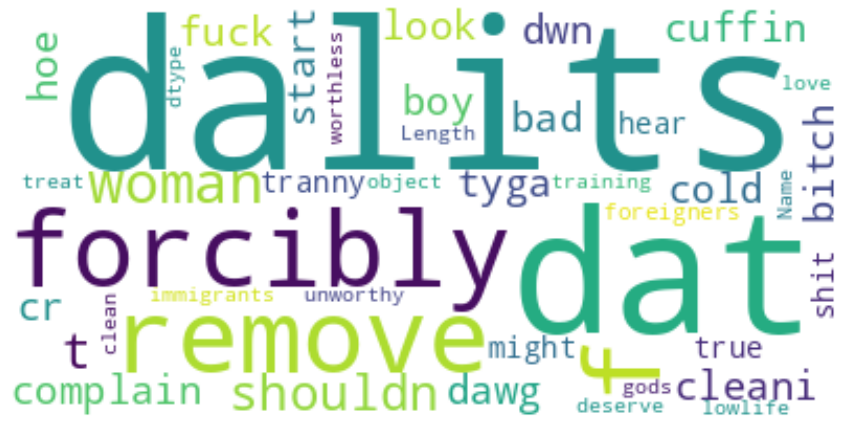

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(collocations=False, background_color='white').generate(str(df02['clean training']))

fig, ax = plt.subplots(figsize=(15, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Top 20 Words

In [ ]:
from collections import Counter

# Combine all reviews into a single string
all_reviews = ' '.join(df02['clean training'])

# Split the string into a list of words
words = all_reviews.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 20 most common words
top20_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# Display the top 20 words
top20_words.style.background_gradient(cmap='Greens')

,Word,Count
0,be,200990
1,the,175988
2,you,144688
3,i,134291
4,to,123866
5,a,115586
6,and,103206
7,of,86758
8,that,65655
9,it,62177


## Label Distribution

In [ ]:
risky = 0
potentially_risky = 0
non_risky = 0
void = 0
other = 0

for label in str(df02['label']):
    if label == '1':
        potentially_risky += 1
    elif label == '2':
        risky += 1
    elif label == '0':
        non_risky += 1
    elif label == "":
        void += 1
    else:
        other += 1

print(risky)
print(potentially_risky)
print(non_risky)
print(other)
print(void)

8
16
5
144
0


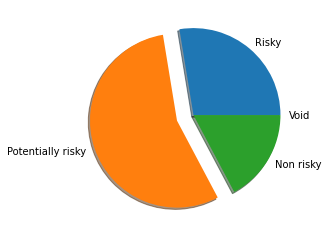

In [ ]:
y = np.array([risky, potentially_risky, non_risky, void])
custom_labels = ["Risky", "Potentially risky", "Non risky", "Void"]
myexplode = [0, 0.2, 0, 0] # not compulsory (use for interesting value, i.e, most or least represented)

plt.pie(y, labels = custom_labels, explode = myexplode, shadow = True)
plt.show() 

# Pre Processing

## Split Data into Train and Test Data

In [ ]:
X,y = df02['clean training'],df02['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify =y, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(126329,) (126329,) (31583,) (31583,)


## TF-IDF

In [ ]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(126329, 93818)
(31583, 93818)


# Finding Models with good accuracy

## Logistic Regression

In [ ]:
lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

In [ ]:
lr.fit(X_train_tf,y_train)
model_lr = lr.predict(X_test_tf)

print(classification_report(y_test, model_lr))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      9816
           1       0.81      0.81      0.81     10475
           2       0.72      0.72      0.72     11292

    accuracy                           0.77     31583
   macro avg       0.77      0.77      0.77     31583
weighted avg       0.77      0.77      0.77     31583



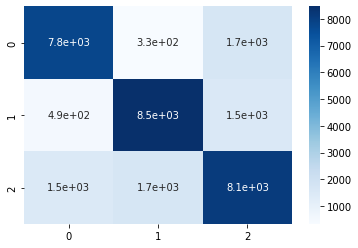

In [ ]:
conf_matrix = confusion_matrix(y_test, model_lr)
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.show()

## Decision Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train_tf, y_train)
modeldt = dt.predict(X_test_tf)
print(classification_report(y_test, modeldt))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      9816
           1       0.68      0.67      0.68     10475
           2       0.56      0.58      0.57     11292

    accuracy                           0.65     31583
   macro avg       0.65      0.65      0.65     31583
weighted avg       0.65      0.65      0.65     31583



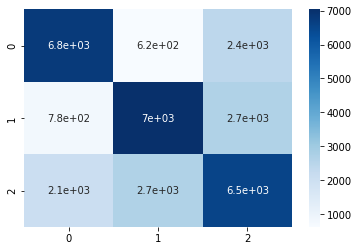

In [ ]:
conf_matrix = confusion_matrix(y_test, modeldt)
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.show()

## XG Boost

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',n_estimators=50)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
xgb.fit(X_train_tf, y_train)
predxgb=xgb.predict(X_test_tf)
modelxgb=accuracy_score(y_test,predxgb)
matrixxgb=confusion_matrix(y_test,predxgb)
print(modelxgb)
print(matrixxgb)
print(classification_report(y_test, predxgb))

0.7065826552259127
[[7544  235 2037]
 [ 909 7783 1783]
 [2679 1624 6989]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      9816
           1       0.81      0.74      0.77     10475
           2       0.65      0.62      0.63     11292

    accuracy                           0.71     31583
   macro avg       0.71      0.71      0.71     31583
weighted avg       0.71      0.71      0.71     31583



## ADA Boost

In [ ]:

# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
ada.fit(X_train_tf, y_train)
predada=ada.predict(X_test_tf)
modelada=accuracy_score(y_test,predada)
matrixada=confusion_matrix(y_test,predada)
print(modelada)
print(matrixada)
print(classification_report(y_test, predada))

0.6259696672260393
[[7543  278 1995]
 [1340 7582 1553]
 [4452 2195 4645]]
              precision    recall  f1-score   support

           0       0.57      0.77      0.65      9816
           1       0.75      0.72      0.74     10475
           2       0.57      0.41      0.48     11292

    accuracy                           0.63     31583
   macro avg       0.63      0.63      0.62     31583
weighted avg       0.63      0.63      0.62     31583

